## Assignment - 4: SVM - Diabetes Prediction
### ID: eo9232
### Name: Md Reza
### IE7860 - Winter 2022

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display

import tensorflow 
tensorflow.random.set_seed(432)
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## **Exploratory Data Analysis**

In [2]:
diadetes_df = pd.read_csv('diabetes.csv')

In [3]:
diadetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Data Preprocessing**

## **Handling missing values** ##

In [4]:
diadetes_df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [5]:
diadetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
print("Number of rows with 0 values for each variable")
for col in diadetes_df.columns:
    missing_rows = diadetes_df.loc[diadetes_df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [7]:
# Replace '0' with nan
diadetes_df['Glucose'] = diadetes_df['Glucose'].replace(0, np.nan)
diadetes_df['BloodPressure'] = diadetes_df['BloodPressure'].replace(0, np.nan)
diadetes_df['SkinThickness'] = diadetes_df['SkinThickness'].replace(0, np.nan)
diadetes_df['Insulin'] = diadetes_df['Insulin'].replace(0, np.nan)
diadetes_df['BMI'] = diadetes_df['BMI'].replace(0, np.nan)

In [8]:
print("Number of rows with 0 values for each variable")
for col in diadetes_df.columns:
    missing_rows = diadetes_df.loc[diadetes_df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [9]:
# Replace nan with average value
diadetes_df['Glucose'] = diadetes_df['Glucose'].fillna(diadetes_df['Glucose'].mean())
diadetes_df['BloodPressure'] = diadetes_df['BloodPressure'].fillna(diadetes_df['BloodPressure'].mean())
diadetes_df['SkinThickness'] = diadetes_df['SkinThickness'].fillna(diadetes_df['SkinThickness'].mean())
diadetes_df['Insulin'] = diadetes_df['Insulin'].fillna(diadetes_df['Insulin'].mean())
diadetes_df['BMI'] = diadetes_df['BMI'].fillna(diadetes_df['BMI'].mean())

## Data Preperation

In [10]:
# Scaled the dataset
diadetes_df_scaled = preprocessing.scale(diadetes_df)
diadetes_df_scaled = pd.DataFrame(diadetes_df_scaled, columns=diadetes_df.columns)
diadetes_df_scaled['Outcome'] = diadetes_df['Outcome']
diadetes_df = diadetes_df_scaled
diadetes_df.describe().loc[['mean', 'std','max'],].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.54,4.1,7.95,8.13,5.04,5.88,4.06,1.00


#### Split the data set in a training set and a test set 

In [11]:
from sklearn.preprocessing import StandardScaler
X = diadetes_df.loc[:, diadetes_df.columns != 'Outcome']
y = diadetes_df.loc[:, 'Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20,random_state=42)

In [13]:
# Convert DataFrame into np array
X_train = np.array(X_train) 
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


## Hyper-parameters tune with GridSearchCV to Find the Best Parameters

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = GridSearchCV(SVC(random_state=0,probability=True), parameters, cv = 5, verbose=False, n_jobs=-1)
print('\x1b[1;03;30;1;95m'+ 'GridSearchCV:\x1b[1;94m')
svc.fit(X_train,y_train)

GridSearchCV:


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=False)

In [15]:
best_C = list(svc.best_params_.values())[0]
best_Kernel = list(svc.best_params_.values())[1]

print('\x1b[1;03;30;1;95m'+ 'Best C:\x1b[1;94m ', best_C)
print('\x1b[1;03;30;1;95m'+ 'Best Kernel:\x1b[1;94m ', best_Kernel)

Best C:  1
Best Kernel:  rbf


## Building The MLP Model

In [16]:
svc = SVC(C = best_C, kernel = best_Kernel)

## **Model Compilation** ##

In [17]:
svc.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Evaluate The MLP Model

##### Traning & Test Accuracy

In [18]:
train_accuracy = (svc.score(X_train, y_train))
test_accuracy  = (svc.score(X_test, y_test))

print('\x1b[1;03;30;1;95m' + 'Accuracy on training set:\x1b[1;94m ', '%.4f' % train_accuracy)
print('\x1b[1;03;30;1;95m'+ 'Accuracy on test set:\x1b[1;94m ', '%.4f' % test_accuracy)

Accuracy on training set:  0.8306
Accuracy on test set:  0.7532


##### Cross-Validation Score on Traning Data

In [19]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, random_state=123456)
cv_results = cross_val_score(svc, X_train, y_train,  verbose=0, cv=kfold, scoring="accuracy")

print('\x1b[1;03;30;1;95m' + 'Cross-validation mean scroe on training set:\x1b[1;94m ', '%.4f' % cv_results.mean())
print('\x1b[1;03;30;1;95m' + 'Cross-validation standard deviation scroe on training set:\x1b[1;94m ', '%.4f' % cv_results.std())

Cross-validation mean scroe on training set:  0.7654
Cross-validation standard deviation scroe on training set:  0.0397


##### Cross-Validation Score on Test Data

In [20]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, random_state=123456)
cv_results = cross_val_score(svc, X_test, y_test,  verbose=0, cv=kfold, scoring="accuracy")

print('\x1b[1;03;30;1;95m' + 'Cross-validation mean scroe on test set:\x1b[1;94m ', '%.4f' % cv_results.mean())
print('\x1b[1;03;30;1;95m' + 'Cross-validation standard deviation scroe on test set:\x1b[1;94m ', '%.4f' % cv_results.std())

Cross-validation mean scroe on test set:  0.7937
Cross-validation standard deviation scroe on test set:  0.0706


In [21]:
y_pred = svc.predict(X_test)

#### **Testing accuracy** ####

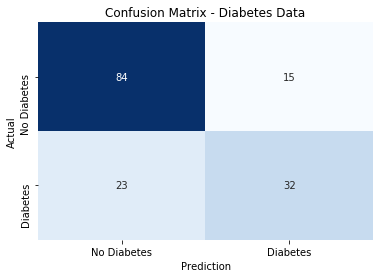

In [22]:
# Results - Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap = 'Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix - Diabetes Data")
plt.show()

In [23]:
from sklearn.metrics import classification_report
print('\x1b[1;03;30;1;95m'+ 'Classifiction Report For Diabetes Data:\x1b[1;94m')
print('\x1b[1;03;30;1;95m'+ '\nResults on the test set: \x1b[1;94m')
print(classification_report(y_test, y_pred))

Classifiction Report For Diabetes Data:

Results on the test set: 
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.68      0.58      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



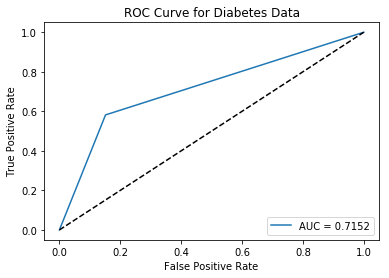

In [24]:
# Results - ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
FPR, TPR, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(FPR, TPR, label= 'AUC = {0:.4f}'.format(auc))
plt.plot([0,1],[0,1],'--', color='black')
plt.title('ROC Curve for Diabetes Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()